# Airbnb Listings Analysis
## Objective 1: Data Preparation & QA

- Read the Airbnb Data
- Cast any date columns as date-time format
- Filter down data to just listings in the city of Paris.
- QA the Paris listing data: check for missing values, and calculate column minimum, maximum and average for each numeric field.

In [13]:
import pandas as pd

In [37]:
listings = pd.read_csv(
    "D:/Listings.csv", 
    encoding ="ISO-8859-1", 
    low_memory=False,
    parse_dates = ['host_since'] #Parse list of columns as date-time when loading a file from source
)

In [38]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [43]:
# As we parse columns as lists while loading, there is no need to perform it separately
# listings['host_since'] = pd.to_datetime(listings['host_since'])

In [67]:
Paris_listings = (
    listings
    .query(" city == 'Paris'")
    .loc[:,['host_since', 'neighbourhood' , 'city', 'accommodates', 'price']]
)

In [69]:
Paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [71]:
Paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [73]:
Paris_listings.dropna(subset=["host_since"], axis=0, inplace=True)

In [75]:
Paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [77]:
Paris_listings.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [83]:
Paris_listings.query("accommodates == 0 and price == 0").count()
# As these entries are only 1% from the dataset it will not impact the analysis. So keep them as it is.

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## Objective 2: Prepare data for Visualization

- Create a Dataframe called paris_listings_neighbourhood. Group the Paris_lisyings by neighbourhood and calculate average price for each. Sort by price in ascending order
- Create a Dataframe called paris_listings_accommodations. Filter down your data to the most expensive neighbourhood in Paris. Group it by accommodates & calculate average price for each. Sort by price in ascending order.
- Finally create a Dataframe called paris_listings_over_time. Group the data by year component of the host_since. Calculate the count of rows to get the number of host each year and average price of listings for each year.

In [96]:
paris_listings_neighbourhood = (
    Paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955


In [100]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.891525
Passy,161.190476
Louvre,175.379972
Elysee,210.536765


In [110]:
paris_listings_accommodations = (
    Paris_listings
    .query("neighbourhood =='Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [114]:
paris_listings_over_time = (
    Paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Objective 3 : Visualize Data

- Build a horizontal bar chart of average rent price by neighbourhood. Which nieghbouhood stands out?
- Build a horizontal bar chart of average rent price by accommodates in the most expensive neighbouhood. Are yhe results intutive?
- Finally build line charts of new host per year and average price by year. What happened to new host in 2015? Was average price impacted?
- Challenge : Plot both time series in a dual axis line chart!

In [118]:
import seaborn as sns

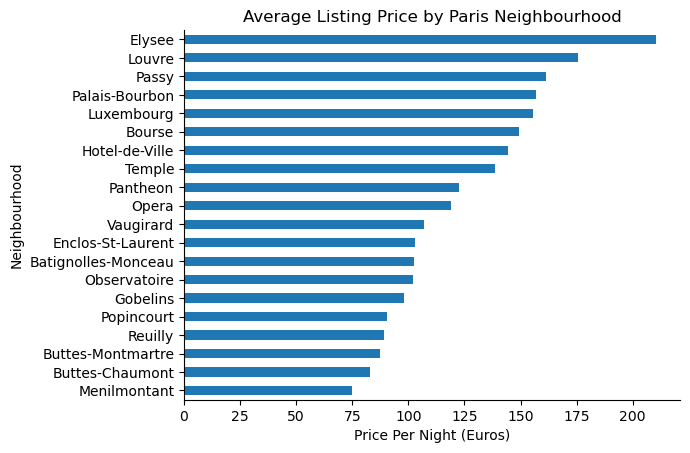

In [124]:
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price Per Night (Euros)",
     ylabel="Neighbourhood",
     legend= None
 ))
sns.despine()

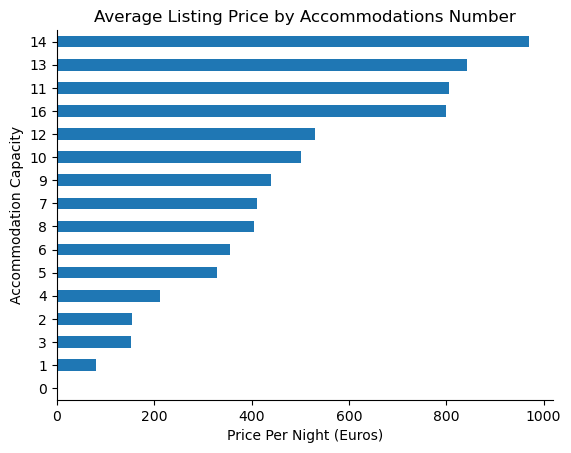

In [126]:
(paris_listings_accommodations
 .plot
 .barh(
     title="Average Listing Price by Accommodations Number",
     xlabel="Price Per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend= None
 ))
sns.despine()

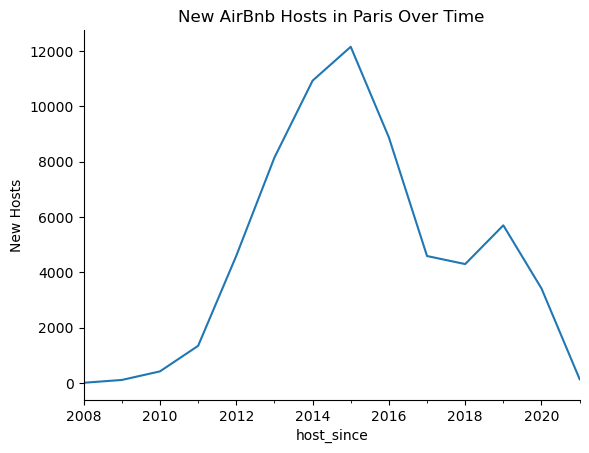

In [128]:
paris_listings_over_time['neighbourhood'].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)
sns.despine()

In 2015 price of new airbnb listing are too high and communities started complaining, so government set some regulations on airbnb listings ie. who could list and at what price etc. So after that new airbnb new host decreases.

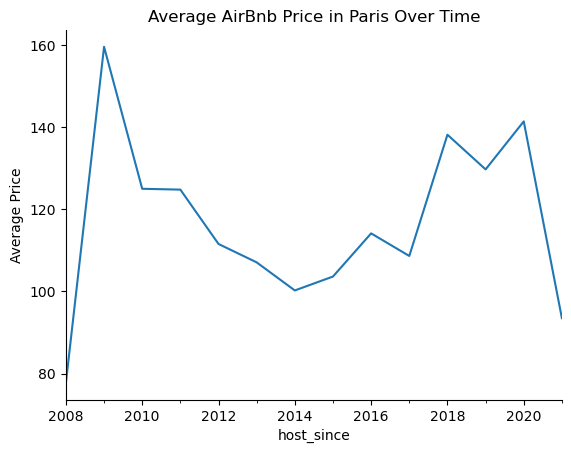

In [131]:
paris_listings_over_time['price'].plot(
    ylabel="Average Price",
    title="Average AirBnb Price in Paris Over Time"
)
sns.despine()

From the above map, we can visualize that as new Airbnb started listing prices increased, and when there were more competitors prices decreased. And in 2015 when the government set some regulations on Airbnb listings, the price started to increase. 

In [134]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

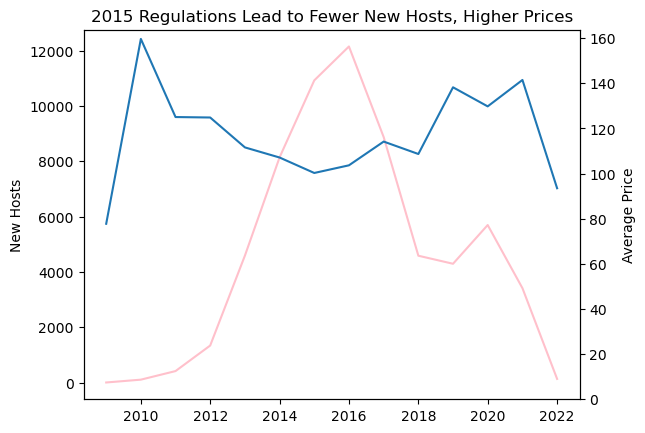

In [152]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
);
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"
);
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")